<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Unit_1_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
---
In this project we investigate the relationship between the stock indices and volatility indices in the US and Europe.  A stock index is typically a weighted average price of a selection of stocks from a region or industry.  A volatility index is the market's expectation of volatility in the future for a specific stock index.  For this exercise we chose two of the most commonly referenced indices, the S&P500 and the Eurostoxx 50 and their respective volatility index counterparts - the VIX and V2TX.

### Data Import and Wrangling

In [0]:
#importing libraries and data.  the data for the US was all obtained from yahoo finance, and for the european data was all from the historical libraries
# of stoxx, a european index specialist.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
# S&p500 and VIX data free from yahoo finance
# data downloaded for free from 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
# data downloaded for free from 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'  

In [10]:
from google.colab import files
uploaded = files.upload()

Saving usdata.txt to usdata.txt


In [0]:
#these are not the original imports.  i downloaded them to my computer so i didn't need to keep importing them
#every time I import i have to reconvert the Date column to datetime, so we can merge on this later
vs = pd.read_csv('vstoxx_hist.txt',header=2,parse_dates=True,sep=',')
vs['Date'] = pd.to_datetime(vs['Date'],format='%d.%m.%Y')


In [0]:
stoxx=pd.read_csv('estoxx clean.txt',skiprows=3,parse_dates=True,sep=';')
stoxx.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
stoxx['Date'] = pd.to_datetime(stoxx['Date'],format='%d.%m.%Y')
stoxx = stoxx.reset_index(drop=True)

In [237]:
import datetime as dt
df = stoxx[stoxx['Date']>dt.datetime(1999,1,1)].copy()
df = pd.merge(df,vs,on='Date',how='outer')
df = df.set_index('Date')
df = df.fillna(method='ffill')
df=df[:4387]
#df = df.drop(dt.datetime(2016,3,25)) #dropping good friday as prices are zeros
#df = df.drop(dt.datetime(2016,3,28)) #and easter monday 2016
df = df.set_value(dt.datetime(2006,6,21),'V6I1',29.4794)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [0]:
#checking for NaNa
df.isna().sum()

In [0]:
#this was the original command to import data from yahoo.  pandas daatareader is a great resource to get historical prices from a number of places
# free and quickly
#usdata = data.DataReader(["^GSPC", "^VIX"], "yahoo",start='1999-1-1')

In [0]:
#clening saved data from us
usdata=pd.read_csv('usdata.txt',skiprows=2)
usdata['Date'] = pd.to_datetime(usdata['Date'],format='%Y-%m-%d')
usdata = usdata.set_index('Date',drop=True)
usdata.columns = pd.MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['^GSPC', '^VIX']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['Attributes', 'Symbols'])

In [39]:
usdata.head()

Attributes         High                     Low                    Open  \
Symbols           ^GSPC       ^VIX        ^GSPC       ^VIX        ^GSPC   
Date                                                                      
1999-01-04  1248.810059  26.959999  1219.099976  24.740000  1229.229980   
1999-01-05  1246.109985  25.980000  1228.099976  24.360001  1228.099976   
1999-01-06  1272.500000  23.379999  1244.780029  22.680000  1244.780029   
1999-01-07  1272.339966  24.900000  1257.680054  24.040001  1272.339966   
1999-01-08  1278.239990  24.080000  1261.819946  22.809999  1269.729980   

Attributes                   Close                Volume         Adj Close  \
Symbols          ^VIX        ^GSPC       ^VIX      ^GSPC ^VIX        ^GSPC   
Date                                                                         
1999-01-04  25.379999  1228.099976  26.170000  877000000    0  1228.099976   
1999-01-05  25.920000  1244.780029  24.459999  775000000    0  1244.780029   
1999-01-06  23.360001  1272.339966  23.340000  986900000    0  1272.339966   
1999-01-07  24.420000  1269.729980  24.370001  863000000    0  1269.729980   
1999-01-08  22.950001  1275.089966  23.280001  937800000    0  1275.089966   

Attributes             
Symbols          ^VIX  
Date                   
1999-01-04  26.170000  
1999-01-05  24.459999  
1999-01-06  23.340000  
1999-01-07  24.370001  
1999-01-08  23.280001

In [40]:
#pandas datareader gives a column multiindex which i hadn't seen before
usdata.columns

MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['^GSPC', '^VIX']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['Attributes', 'Symbols'])

In [260]:
#makign stripped down version to do some analysis on
df_strip = df.copy()[['SX5E','V2TX']]
df_strip.tail()

,SX5E,V2TX
Date,,
2016-02-08,2785.17,33.3917
2016-02-09,2736.50,33.9664
2016-02-10,2789.05,33.4528
2016-02-11,2680.35,38.3051
2016-02-12,2756.16,35.6846


In [0]:
usdata_strip = usdata['Close'].copy()[:4306]
usdata_strip.columns=['S&P500','VIX']
#usdata_strip.columns = usdata_strip.columns.droplevel()

In [264]:
usdata_strip.tail()

,S&P500,VIX
Date,,
2016-02-08,1853.439941,26.000000
2016-02-09,1852.209961,26.540001
2016-02-10,1851.859985,26.290001
2016-02-11,1829.079956,28.139999
2016-02-12,1864.780029,25.400000


In [0]:
#more nan checking
usdata.isna().sum()

In [0]:
mf = pd.merge(df_strip,usdata_strip,on='Date',how='outer')
mf = mf.sort_index()
mf =mf.fillna(method='ffill')
#mf = mf[:4550] #taking out extra 

In [266]:
#checking meged dataframe looks ok
mf.tail()

,SX5E,V2TX,S&P500,VIX
Date,,,,
2016-02-08,2785.17,33.3917,1853.439941,26.000000
2016-02-09,2736.50,33.9664,1852.209961,26.540001
2016-02-10,2789.05,33.4528,1851.859985,26.290001
2016-02-11,2680.35,38.3051,1829.079956,28.139999
2016-02-12,2756.16,35.6846,1864.780029,25.400000


In [267]:
#and has no nans which are easy to generate from different holidays between us and europe
mf.isna().sum()

SX5E      0
V2TX      0
S&P500    0
VIX       0
dtype: int64

### First Visualizations

In the below plots we can see there seems to be a very stronng negative correlation between the indeces and their respective volatility indices.

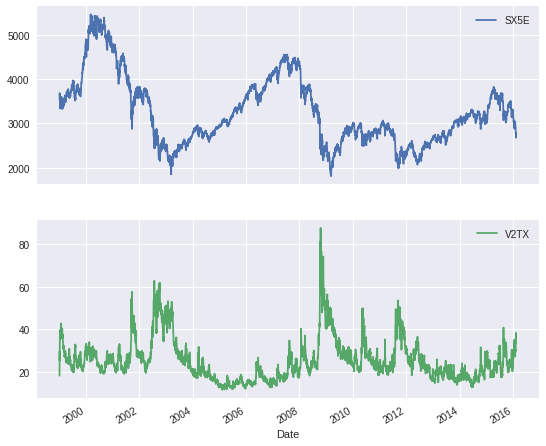

In [268]:
mf[['SX5E','V2TX']].plot(subplots=True, figsize=(9,8));

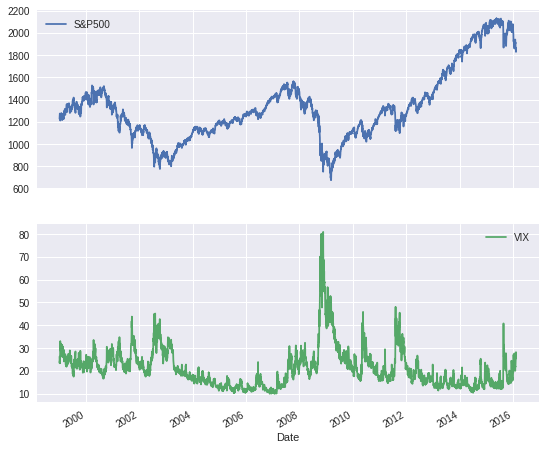

In [269]:
mf[['S&P500','VIX']].plot(subplots=True, figsize=(9,8));

Now we do some analysis on the log of the daily returns and see the correlation is extremely high: above 75 in the US and 73 in Europe.

In [0]:
#makign a dataframe of the log returns
logs = np.log(mf/mf.shift(1))
logs=logs.dropna()


In [276]:
logs.corr()

,SX5E,V2TX,S&P500,VIX
SX5E,1.000000,-0.736980,0.568747,-0.458427
V2TX,-0.736980,1.000000,-0.419888,0.513432
S&P500,0.568747,-0.419888,1.000000,-0.751938
VIX,-0.458427,0.513432,-0.751938,1.000000


### Linear Regression

Now we can run a linear regression on both regions

In [277]:
#linear regressin on euro data, returning slope, intercept and reg score 
from sklearn.linear_model import LinearRegression
X=logs['SX5E'].values.reshape(-1, 1)
y=logs['V2TX'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)
reg.score(X,y)
x_reg = np.linspace(-0.12,0.12) 
slope = reg.coef_[0][0]
intercept = reg.intercept_[0]
reg.score(X,y), slope, intercept

(0.5431393012957965, -2.8460594659325373, -9.434593607608954e-06)

In [278]:
#same for us data
XX=logs['S&P500'].values.reshape(-1, 1)
yy=logs['VIX'].values.reshape(-1, 1)

reg2 = LinearRegression().fit(XX, yy)
reg2.score(XX,yy)
x_reg2 = np.linspace(-0.12,0.12) 
slope2 = reg2.coef_[0][0]
intercept2=reg2.intercept_[0]
reg2.score(XX,yy), slope2, intercept2

(0.5654105543846486, -3.902566537863178, 0.00036194059498669706)

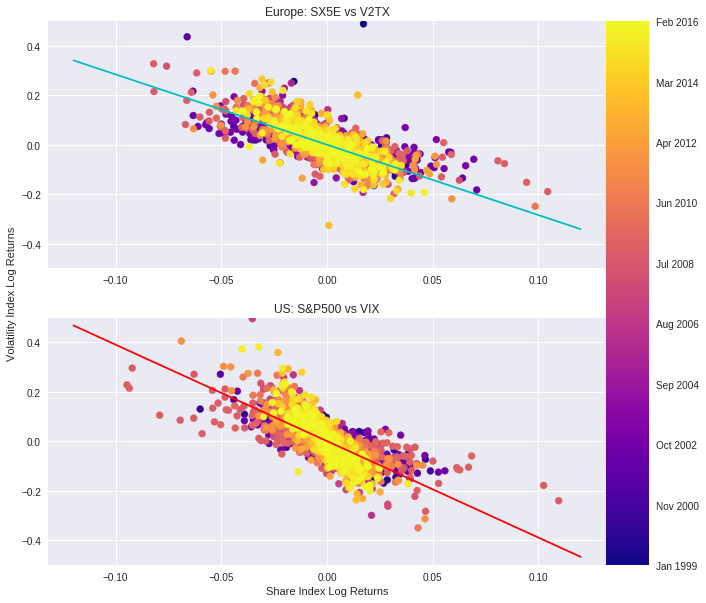

In [282]:
#here we plot both the scatter plots and their regressions
fig, (ax_eu, ax_us) = plt.subplots(2,figsize=(10,10))

ax_eu.set_ylim([-0.5,0.5])
ax_us.set_ylim([-0.5,0.5])

#here we add the date to the plot so we can see how the scatter evolves over time
cm = plt.cm.get_cmap('plasma')
colors = logs.index

scat_eu = ax_eu.scatter(logs['SX5E'],logs['V2TX'],c=colors,cmap=cm)
scat_us = ax_us.scatter(logs['S&P500'],logs['VIX'],c=colors,cmap=cm)
lr_eu = ax_eu.plot(x_reg, intercept+slope*x_reg,c='c')
lr_us = ax_us.plot(x_reg2, intercept2+slope2*x_reg2,c='r')

N_TICKS = 10
logs['Date']=logs.index
indexes = [logs['Date'][i] for i in np.linspace(0,logs.shape[0]-1,N_TICKS).astype(int)] 
ticklist = list(logs[logs['Date'].isin(indexes)]['Date'].astype(int))


cbar_ax = fig.add_axes([0.90, 0.125, 0.06, 0.755])
cb_eu = fig.colorbar(scat_eu,orientation='vertical',ticks = ticklist,cax=cbar_ax)
cb_eu.ax.set_yticklabels([index.strftime('%b %Y') for index in indexes])

ax_eu.set_title('Europe: SX5E vs V2TX')
ax_us.set_xlabel('Share Index Log Returns')
ax_eu.set_ylabel('Volatility Index Log Returns',position=(0.2,-0.1))
ax_us.set_title('US: S&P500 vs VIX');



In the above we see that there is  broadly similar relationship between indices and volatility indices in both Europe and the US.  We can also see the relationship is shifting over time, and the slope each regression is becoming steeper, especially in the US.  This may reflect that the volatility index in the US is coming off a lower base, i.e. very low teens rather than mid teens, which is a very interesting topic with many possible causes, but beyond the scope of this project.

### Rolling Correlation

We now examine the rolling correlations over a year time period (250 business days)

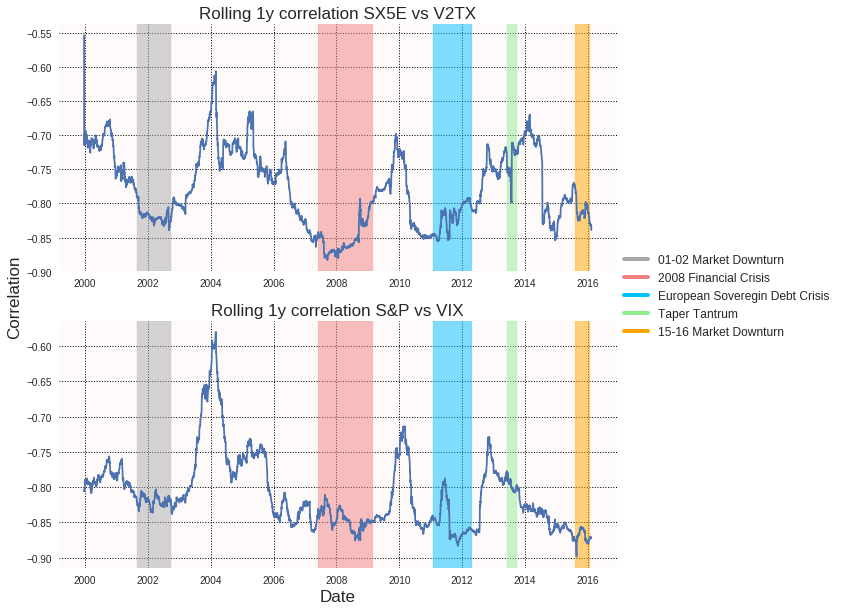

In [357]:
from matplotlib.lines import Line2D
fig_corr, (ax_corr_eu,ax_corr_us) = plt.subplots(2,figsize=(10,10))

x_corr=logs['SX5E'].rolling(250).corr(logs['V2TX'])
y_corr=logs['S&P500'].rolling(250).corr(logs['VIX'])

ax_corr_eu.plot(x_corr)
ax_corr_us.plot(y_corr)

ax_corr_eu.set_title('Rolling 1y correlation SX5E vs V2TX',fontsize=17)
ax_corr_us.set_xlabel('Date',fontsize=17)
ax_corr_eu.set_ylabel('Correlation',position=(0.2,-0.1),fontsize=17)
ax_corr_us.set_title('Rolling 1y correlation S&P vs VIX',fontsize=17)

#generating crises!
selloff_0102=['01-02 Market Downturn',dt.datetime(2001,9,1),dt.datetime(2002,10,1),'#A9A9A9']
fin_crisis=['2008 Financial Crisis',dt.datetime(2007,6,1),dt.datetime(2009,3,1),'#F08080']
eu_crisis=['European Soveregin Debt Crisis',dt.datetime(2011,2,1),dt.datetime(2012,5,1),'#00BFFF']
taper_t=['Taper Tantrum',dt.datetime(2013,6,1),dt.datetime(2013,10,1),'#90EE90']
selloff_1516=['15-16 Market Downturn',dt.datetime(2015,8,5),dt.datetime(2016,2,1),'#FFA500']
crises = [selloff_0102,fin_crisis,eu_crisis,taper_t,selloff_1516]
for crisis in crises:
  ax_corr_eu.axvspan(crisis[1], crisis[2], alpha=0.5, color=crisis[3])
  ax_corr_us.axvspan(crisis[1], crisis[2], alpha=0.5, color=crisis[3])
  
cris_names=[crisis[0] for crisis in crises]
cris_colors = [Line2D([0],[0],color=crisis[3],lw=4) for crisis in crises]
ax_corr_eu.legend(cris_colors,cris_names,loc='center right',bbox_to_anchor=(0.9, -0.35, 0.5, 0.5),fontsize=12)

ax_corr_eu.set_facecolor('#FFFAFA')
ax_corr_eu.grid(b=True,color='k',linestyle='dotted')
ax_corr_us.set_facecolor('#FFFAFA')
ax_corr_us.grid(b=True,color='k',linestyle='dotted');




We can see the correlation though almost always above 0.6, varies significantly over time, and tends to be higher over periods of financial stress, and lower during prolonged rallies.

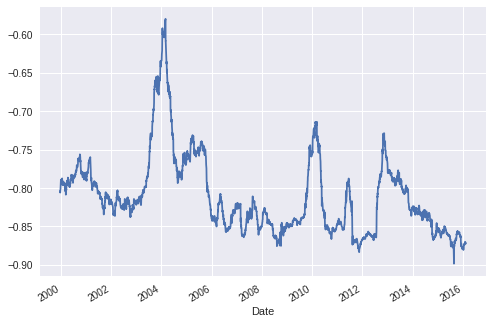

In [283]:
logs['S&P500'].rolling(250).corr(logs['VIX']).plot();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc093be09e8>,
      dtype=object)

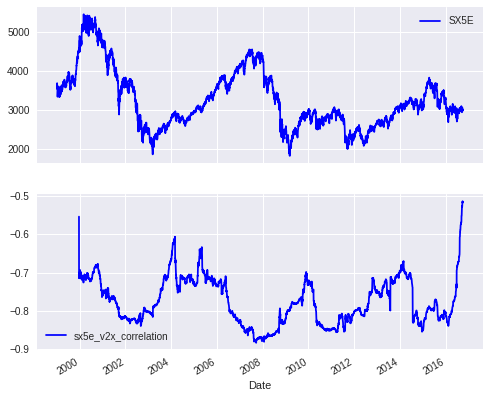

In [133]:
es_plots = pd.DataFrame(mf['SX5E'])
es_plots['sx5e_v2x_correlation'] = logs['SX5E'].rolling(250).corr(logs['V2TX'])
#sp_plots[251:270]
es_plots[['SX5E','sx5e_v2x_correlation']].plot(subplots=True, style='b',figsize=(8,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc093996550>,
      dtype=object)

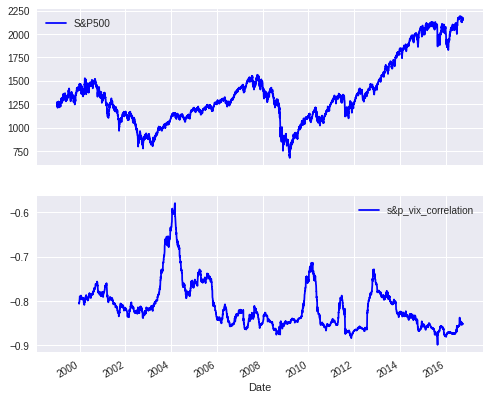

In [132]:
sp_plots = pd.DataFrame(mf['S&P500'])
sp_plots['s&p_vix_correlation'] = logs['S&P500'].rolling(250).corr(logs['VIX'])
#sp_plots[251:270]
sp_plots[['S&P500','s&p_vix_correlation']].plot(subplots=True, style='b',figsize=(8,7))

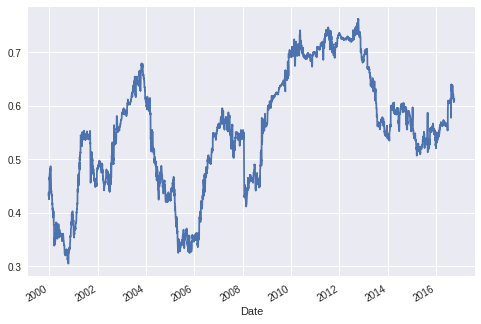

In [126]:
logs['S&P500'].rolling(250).corr(logs['SX5E']).plot();

In [111]:
altplot.head()

,SX5E,V2TX,S&P500,VIX,time
Date,,,,,
1999-01-05,0.017228,0.489248,0.013491,-0.067575,1999-01-05
1999-01-06,0.022138,-0.165317,0.021899,-0.046870,1999-01-06
1999-01-07,-0.015723,0.256337,-0.002053,0.043184,1999-01-07
1999-01-08,-0.003120,0.021570,0.004212,-0.045758,1999-01-08
1999-01-11,-0.019593,0.103173,-0.008830,0.089514,1999-01-11


In [0]:
mf['SX5E'].rolling(10).std()*10/(252**2)

In [88]:
rets = (mf/mf.shift(1)).copy()
rets.isna().sum()

SX5E      1
V2TX      1
S&P500    1
VIX       1
dtype: int64

In [89]:
rets.head()

,SX5E,V2TX,S&P500,VIX
Date,,,,
1999-01-04,NaN,NaN,NaN,NaN
1999-01-05,1.017377,1.631089,1.013582,0.934658
1999-01-06,1.022385,0.847625,1.022140,0.954211
1999-01-07,0.984400,1.292188,0.997949,1.044130
1999-01-08,0.996885,1.021805,1.004221,0.955273


In [123]:
x=22
mf_r = mf.copy()
mf_r['30dayrlzd_sx5e']=rets['SX5E'].rolling(x).std()*((250)**0.5)*100
mf_r['30dayrlzd_s&p']=rets['S&P500'].rolling(x).std()*((250)**0.5)*100
mf_r['next30_sx5e']=mf_r['30dayrlzd_sx5e'].shift(-x)
mf_r['next30_s&p']=mf_r['30dayrlzd_s&p'].shift(-x)
mf_r['sx5e_diff']=mf_r['V2TX']-mf_r['next30_sx5e']
mf_r['s&p_diff']=mf_r['VIX']-mf_r['next30_s&p']
mf_r.head()

,SX5E,V2TX,S&P500,VIX,30dayrlzd_sx5e,30dayrlzd_s&p,next30_sx5e,next30_s&p,sx5e_diff,s&p_diff
Date,,,,,,,,,,
1999-01-04,3543.10,18.2033,1228.099976,26.170000,NaN,NaN,31.148241,20.231809,-12.944941,5.938191
1999-01-05,3604.67,29.6912,1244.780029,24.459999,NaN,NaN,30.502127,20.869176,-0.810927,3.590823
1999-01-06,3685.36,25.1670,1272.339966,23.340000,NaN,NaN,29.351078,19.501827,-4.184078,3.838173
1999-01-07,3627.87,32.5205,1269.729980,24.370001,NaN,NaN,29.049994,19.560624,3.470506,4.809377
1999-01-08,3616.57,33.2296,1275.089966,23.280001,NaN,NaN,31.065072,20.736829,2.164528,2.543172


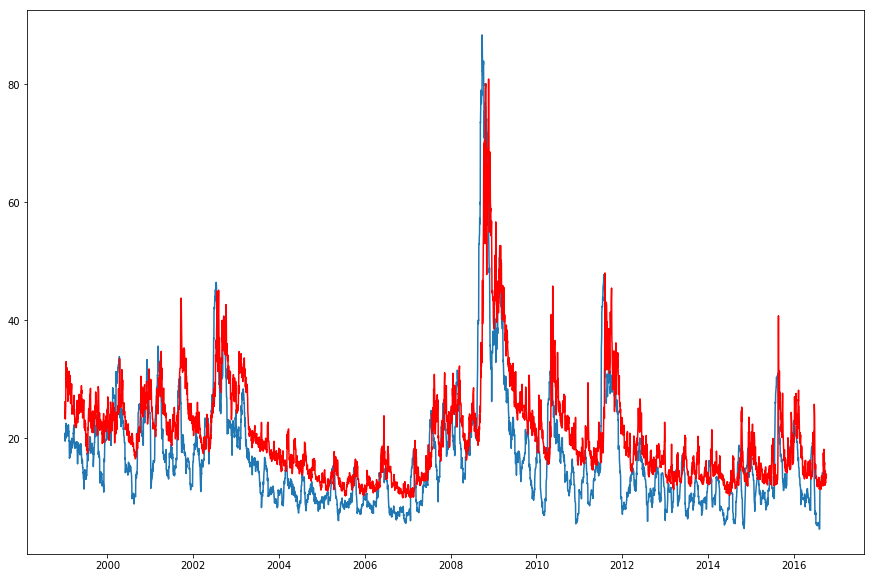

In [105]:
plt.figure(figsize=(15,10))
ax_us = plt.plot(mf_r['next30_s&p'])
ax_us2 = plt.plot(mf_r['VIX'],c='r')
#ax_us.figure.set_size_inches(15, 8)


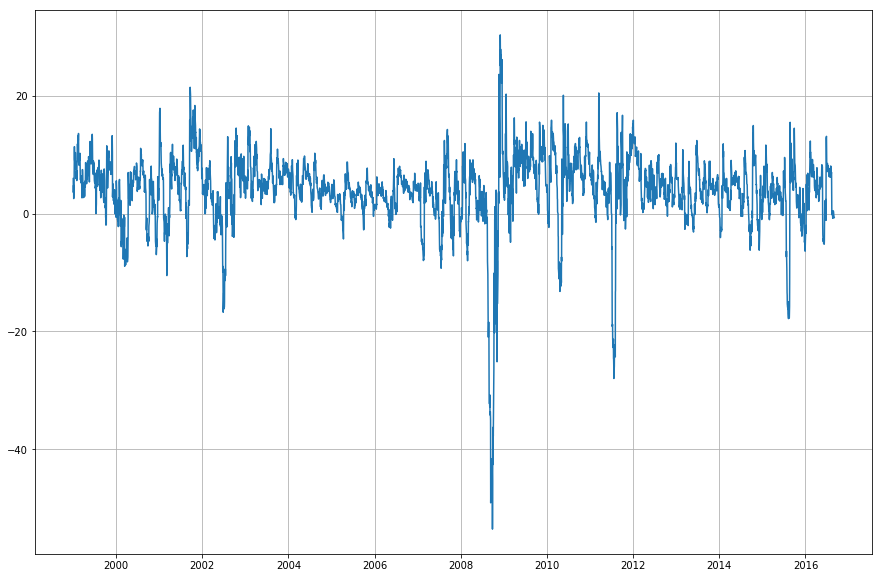

In [119]:
plt.figure(figsize=(15,10))
plt.grid()
ax_us = plt.plot(mf_r['s&p_diff'])

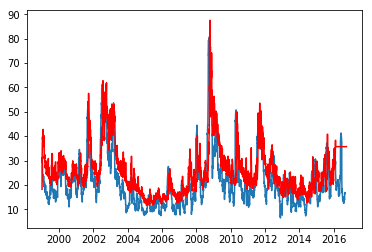

In [106]:
plt.plot(mf_r['next30_sx5e'])
plt.plot(mf_r['V2TX'],c='r')

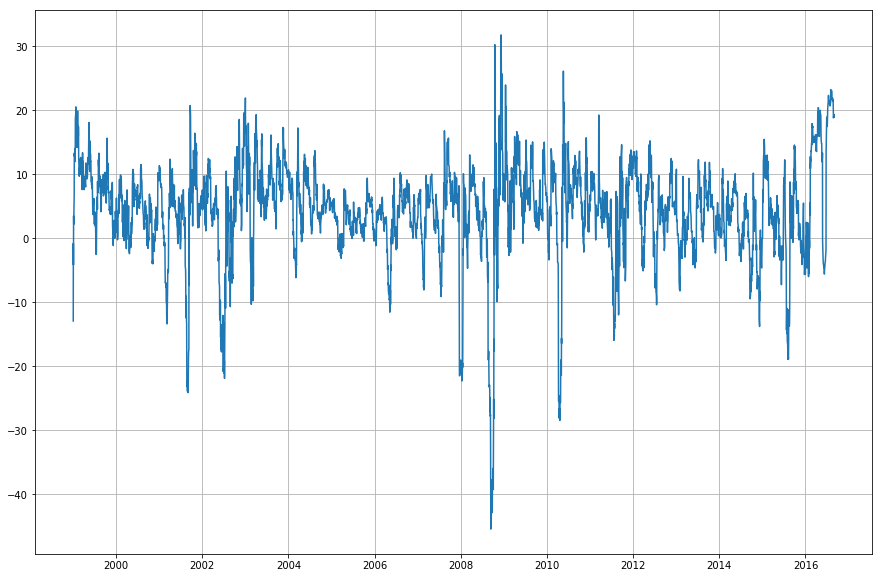

In [124]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(mf_r['sx5e_diff']);